In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sn

In [21]:
df_train1= pd.read_csv('WDBC_Train.csv')
df_train = df_train1.iloc[:, 1:]
# print(df_train)
X_train_orig = df_train.iloc[:, :-1]
y_train_orig = df_train.iloc[:, -1]


val1=pd.read_csv('WDBC_Validation.csv')
test1=pd.read_csv('WDBC_Test.csv')

val = val1.iloc[:, 1:]
test = test1.iloc[:, 1:]

X_val_orig = val.iloc[:, :-1]
y_val_orig = val.iloc[:, -1]

X_test_orig = test.iloc[:, :-1]
y_test_orig = test.iloc[:, -1]

In [22]:
print(X_val_orig)
print(X_train_orig)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0         12.160         18.03           78.29      455.3          0.09087   
1         12.720         13.78           81.78      492.1          0.09667   
2          9.683         19.34           61.05      285.7          0.08491   
3         11.670         20.02           75.21      416.2          0.10160   
4         12.700         12.17           80.88      495.0          0.08785   
..           ...           ...             ...        ...              ...   
109       19.440         18.82          128.10     1167.0          0.10890   
110       13.880         16.16           88.37      596.6          0.07026   
111       14.810         14.70           94.66      680.7          0.08472   
112       12.060         18.90           76.66      445.3          0.08386   
113       12.210         14.09           78.78      462.0          0.08108   

     compactness_mean  concavity_mean  concave_points_mean  sym

K=1
Confusion Matrix:
[[69  2]
 [ 9 34]]
Accuracy: 0.9035, Precision: 0.9444, Recall: 0.7907, F1-score: 0.8608

K=7
Confusion Matrix:
[[71  0]
 [ 7 36]]
Accuracy: 0.9386, Precision: 1.0000, Recall: 0.8372, F1-score: 0.9114

K=11
Confusion Matrix:
[[70  1]
 [ 8 35]]
Accuracy: 0.9211, Precision: 0.9722, Recall: 0.8140, F1-score: 0.8861



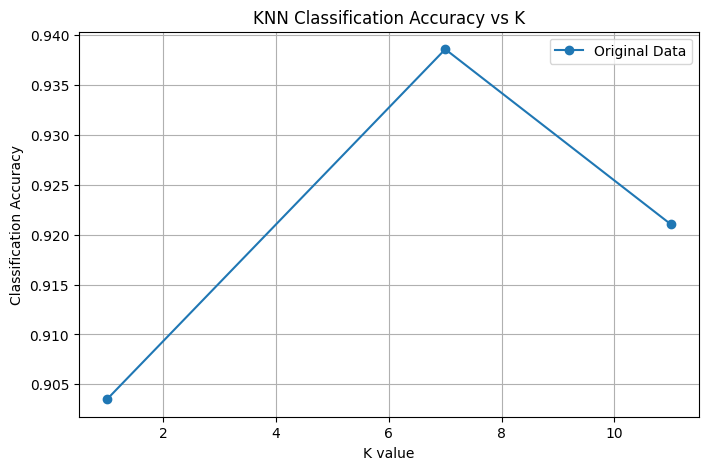

In [23]:
accuracy_scores = []
# Define K values
k_values = [1, 7, 11]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_orig, y_train_orig)
    y_pred = knn.predict(X_val_orig)

    cm = confusion_matrix(y_val_orig, y_pred)
    acc = accuracy_score(y_val_orig, y_pred)
    precision = precision_score(y_val_orig, y_pred)
    recall = recall_score(y_val_orig, y_pred)
    f1 = f1_score(y_val_orig, y_pred)

    print(f"K={k}")
    print("Confusion Matrix:")
    print(cm)
    print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")

    accuracy_scores.append(acc)
# 6. Plot Accuracy vs K
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracy_scores, marker='o', label='Original Data')
plt.xlabel("K value")
plt.ylabel("Classification Accuracy")
plt.title("KNN Classification Accuracy vs K")
plt.legend()
plt.grid()
plt.show()

In [28]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_orig, y_train_orig)
y_pred = knn.predict(X_test_orig)

cm = confusion_matrix(y_test_orig, y_pred)
acc = accuracy_score(y_test_orig, y_pred)
precision = precision_score(y_test_orig, y_pred)
recall = recall_score(y_test_orig, y_pred)
f1 = f1_score(y_test_orig, y_pred)

print(f"K={1}")
print("Confusion Matrix:")
print(cm)
print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")

K=1
Confusion Matrix:
[[71  1]
 [ 8 34]]
Accuracy: 0.9211, Precision: 0.9714, Recall: 0.8095, F1-score: 0.8831

